# Importing necessary libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [46]:
# Data manipulation and handling
import pandas as pd
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sci

# Multicollinearity test and treatment libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# Data Preprocessing and EDA libraries
from collections import OrderedDict
from sklearn.preprocessing import StandardScaler

# Model selection libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve


# ML Models 
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor


# Model evaluation libraries
from sklearn.metrics import r2_score, mean_squared_error

#Unsupervised ML Library
from sklearn.cluster import KMeans

# Warning filter library
import warnings
warnings.filterwarnings('ignore')



# Loading the DataFrame

In [3]:
df = pd.read_excel("Capstone Project.xlsx")

In [4]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

# Exploratory Data Analysis (EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Observations from df.info
1. There are no null values
2. There are 1030 rows and 9 columns
3. Except age all the columns are data type is float
4. Dependent variable is strength and rest are independent

In [6]:
df.describe()

cement         slag          ash        water  superplastic  \
count  1030.000000  1030.000000  1030.000000  1030.000000   1030.000000   
mean    281.167864    73.895825    54.188350   181.567282      6.204660   
std     104.506364    86.279342    63.997004    21.354219      5.973841   
min     102.000000     0.000000     0.000000   121.800000      0.000000   
25%     192.375000     0.000000     0.000000   164.900000      0.000000   
50%     272.900000    22.000000     0.000000   185.000000      6.400000   
75%     350.000000   142.950000   118.300000   192.000000     10.200000   
max     540.000000   359.400000   200.100000   247.000000     32.200000   

         coarseagg      fineagg          age     strength  
count  1030.000000  1030.000000  1030.000000  1030.000000  
mean    972.918932   773.580485    45.662136    35.817961  
std      77.753954    80.175980    63.169912    16.705742  
min     801.000000   594.000000     1.000000     2.330000  
25%     932.000000   730.950000     7.000000    23.710000  
50%     968.000000   779.500000    28.000000    34.445000  
75%    1029.400000   824.000000    56.000000    46.135000  
max    1145.000000   992.600000   365.000000    82.600000

Analysis from descriptive statistics:
1. There might be skewness in the data
2. There might be chance of outliers if we compare quartiles of some of the columns (age, cement , slag, superplastic, strength in the upper whisker region)
3. Since minimum and Q1 values are same for slag, ash and superplastic, we don't have outliers in the lower whisker region for them
4. Range of values in age is from 1 to 365, we can say that the values are in days


# Building a custom summary function for EDA report

In [7]:
def custom_summary(my_df):
    result = []
    for col in my_df.columns:
        if my_df[col].dtypes != "object":
            stats = OrderedDict({
                "Feature Name":col,
                "Count":my_df[col].count(),
                "Minimum":my_df[col].min(),
                "Quartile 1":my_df[col].quantile(.25),
                "Quartile 2":my_df[col].quantile(.5),
                "Quartile 3":my_df[col].quantile(.75),
                "Mean":my_df[col].mean(),
                "Maximum":my_df[col].max(),
                "Variance":my_df[col].var(),
                "Standard Deviation":my_df[col].std(),
                "Skewness":my_df[col].skew(),
                "Kurtosis":my_df[col].kurt(),                
            })
            result.append(stats)
    result_df = pd.DataFrame(result)
    # Skewness type.
    skewness_label = []
    for i in result_df["Skewness"]:
        if i <= -1:
            skewness_label.append("Highly negatively Skewed")
        elif -1<i<=-0.5:
            skewness_label.append("Moderately negatively Skewed")
        elif -0.5<i<0:
            skewness_label.append("Fairly negatively Skewed")
        elif 0<=i<0.5:
            skewness_label.append("Fairly positively Skewed")
        elif 0.5<=i<1:
            skewness_label.append("Moderately positively Skewed")
        elif i>=1:
            skewness_label.append("Highly positively Skewed")
    result_df["Skewness Comment"] = skewness_label
    kurtosis_label = []
    for i in result_df["Kurtosis"]:
        if i>=1:
            kurtosis_label.append("Leptokurtic Curve")
        elif i<=-1:
            kurtosis_label.append("Platykurtic Curve")
        else:
            kurtosis_label.append("Mesokurtic Curve")
    result_df["Kurtosis Comment"] = kurtosis_label
    Outliers_label = []
    for col in my_df.columns:
        if my_df[col].dtypes != "Object":
            Q1 = my_df[col].quantile(0.25)
            Q2 = my_df[col].quantile(0.5)
            Q3 = my_df[col].quantile(0.75)
            IQR = Q3-Q1
            LW = Q1 - 1.5*IQR
            UW = Q3 + 1.5*IQR
            if len(my_df[(my_df[col] < LW) | (my_df[col] > UW)]) > 0:
                Outliers_label.append("Have Outliers")
            else:
                Outliers_label.append("No Outliers")
    result_df["Outlier Comment"] = Outliers_label
    return result_df

In [8]:
custom_summary(df)

Feature Name  Count  Minimum  Quartile 1  Quartile 2  Quartile 3  \
0        cement   1030   102.00     192.375     272.900     350.000   
1          slag   1030     0.00       0.000      22.000     142.950   
2           ash   1030     0.00       0.000       0.000     118.300   
3         water   1030   121.80     164.900     185.000     192.000   
4  superplastic   1030     0.00       0.000       6.400      10.200   
5     coarseagg   1030   801.00     932.000     968.000    1029.400   
6       fineagg   1030   594.00     730.950     779.500     824.000   
7           age   1030     1.00       7.000      28.000      56.000   
8      strength   1030     2.33      23.710      34.445      46.135   

         Mean  Maximum      Variance  Standard Deviation  Skewness   Kurtosis  \
0  281.167864    540.0  10921.580220          104.506364  0.509481  -0.520652   
1   73.895825    359.4   7444.124812           86.279342  0.800717  -0.508175   
2   54.188350    200.1   4095.616541           63.997004  0.537354  -1.328746   
3  181.567282    247.0    456.002651           21.354219  0.074628   0.122082   
4    6.204660     32.2     35.686781            5.973841  0.907203   1.411269   
5  972.918932   1145.0   6045.677357           77.753954 -0.040220  -0.599016   
6  773.580485    992.6   6428.187792           80.175980 -0.253010  -0.102177   
7   45.662136    365.0   3990.437729           63.169912  3.269177  12.168989   
8   35.817961     82.6    279.081814           16.705742  0.416977  -0.313725   

               Skewness Comment   Kurtosis Comment Outlier Comment  
0  Moderately positively Skewed   Mesokurtic Curve     No Outliers  
1  Moderately positively Skewed   Mesokurtic Curve   Have Outliers  
2  Moderately positively Skewed  Platykurtic Curve     No Outliers  
3      Fairly positively Skewed   Mesokurtic Curve   Have Outliers  
4  Moderately positively Skewed  Leptokurtic Curve   Have Outliers  
5      Fairly negatively Skewed   Mesokurtic Curve     No Outliers  
6      Fairly negatively Skewed   Mesokurtic Curve   Have Outliers  
7      Highly positively Skewed  Leptokurtic Curve   Have Outliers  
8      Fairly positively Skewed   Mesokurtic Curve   Have Outliers

Analysis from Custom Summary
1. Cement has Mesokurtic Curve which implies that data points are moderate in distance from the mean, so mean and standard deviation are moderate
Note : Kurtosis significance. We can get an idea about mean and std deviation
2. Slag has Mesokurtic Curve which implies that data points are moderate in distance from the mean, so mean and standard deviation are moderate
3. Ash has Platykurtic curve which implies mean does not represent the whole data properly, so standard deviation is high
4. Water has Mesokurtic curve which implies that data points are moderate in distance from the mean, so mean and standard deviation are moderate
5. Superplastic has Leptokurtic curve which implies the data points are closer to the mean

# Performing Outlier treatment

In [9]:
def replace_outlier(my_df, col, method = "Quartile", strategy = "Median"):
    # df = 2 dimensional table of rows and columns.
    # HW: Different methods to treat outliers.
    col_data = my_df[col] # How you are supposed to detect outliers
    
    if method == "Quartile":
        # Using quartiles to calculate IQR
        q1 = col_data.quantile(0.25)
        q2 = col_data.quantile(0.5)
        q3 = col_data.quantile(0.75)
        
        iqr = q3 - q1
        lw = q1 - 1.5*iqr
        uw = q3 + 1.5*iqr
    
    elif method == "Standard Deviation":
        # Using Emperical method
        mean = col_data.mean()
        std = col_data.std()
        lw = mean - 2*std
        uw = mean + 2*std
    else:
        print("Pass a correct method")
    
    # Printing all the outliers
    
    outliers = my_df.loc[(col_data < lw) | (col_data > uw)]
    outliers_density = round(len(outliers)/len(my_df), 2 )*100
    if len(outliers) == 0:
        print(f'Feature {col} does not have any outliers')
        print('\n')
    else:
        print(f'Feature {col}  have outliers')
        print('\n')
        print(f'Total number of outliers in {col} are {len(outliers)}')
        print('\n')
        print(f'Outlier percentage in {col} is {outliers_density}%')
        print('\n')
        display(my_df[(col_data < lw) | (col_data > uw)])
        
    # Replacing outliers:
    if strategy == "Median": # Method = Quartile and Strategy = Median
        my_df.loc[(col_data < lw) | (col_data > uw), col] = q2
    elif strategy == "Mean": # Method = STD and Strategy = Mean
        my_df.loc[(col_data < lw) | (col_data > uw), col] = mean
    else:
        print('Pass a correct strategy')
    
    return my_df
        

## ODT (Outliers Detection Techniques) Plots
1. Desciptive plots
2. Histogram with outliers
3. Histogram without outliers

In [10]:
def odt_plots(my_df, col): # Creating Canvas
    f,(ax1, ax2, ax3) = plt.subplots(1,3,figsize = (25,8)) 
    
    # Descriptive statistics box plot
    sns.boxplot(my_df[col], ax = ax1)
    ax1.set_title(col + " " "Box Plot")
    ax1.set_xlabel("Values")
    ax1.set_ylabel("Box Plot")
    
    # Plotting Histogram with outliers
    sns.distplot(my_df[col], ax = ax2, fit = sci.norm)
    ax2.axvline(my_df[col].mean(), color = "Green")
    ax2.axvline(my_df[col].median(), color = "Brown")
    ax2.set_title(col + " " + "Histogram with Outliers")
    ax2.set_xlabel("Values")
    ax2.set_ylabel("Density")
    
    # Replacing Outliers
    df_out = replace_outlier(my_df, col)
    
    # Plotting histogram without outliers
    sns.distplot(df_out[col], ax = ax3, fit = sci.norm) # On histogram we are fitting normal dsitribution plot
    ax3.axvline(df_out[col].mean(), color = "Green") # V line = Green, Brown line = median
    ax3.axvline(df_out[col].median(), color = "Brown") 
    ax3.set_title(col + " " + "Histogram without Outliers")
    ax3.set_xlabel("Values")
    ax3.set_ylabel("Density")
    
    plt.show()

Feature cement does not have any outliers




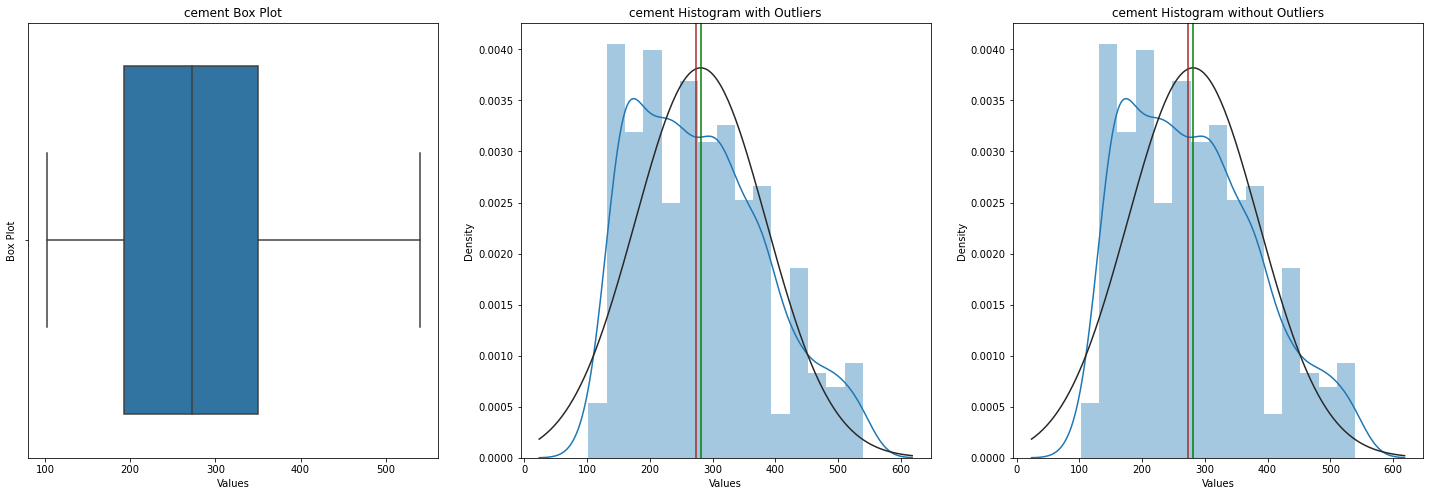

Feature slag  have outliers


Total number of outliers in slag are 2


Outlier percentage in slag is 0.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
918   239.6  359.4  0.0  185.7           0.0      941.6    664.3   28   
990   239.6  359.4  0.0  185.7           0.0      941.6    664.3    7   

     strength  
918     39.44  
990     25.42

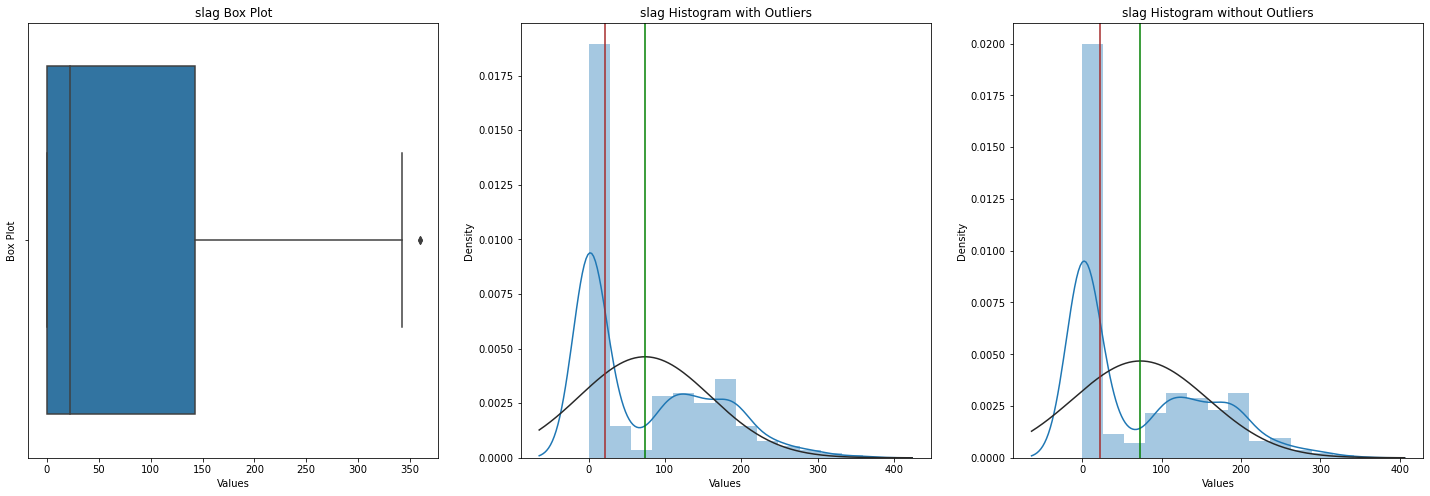

Feature ash does not have any outliers




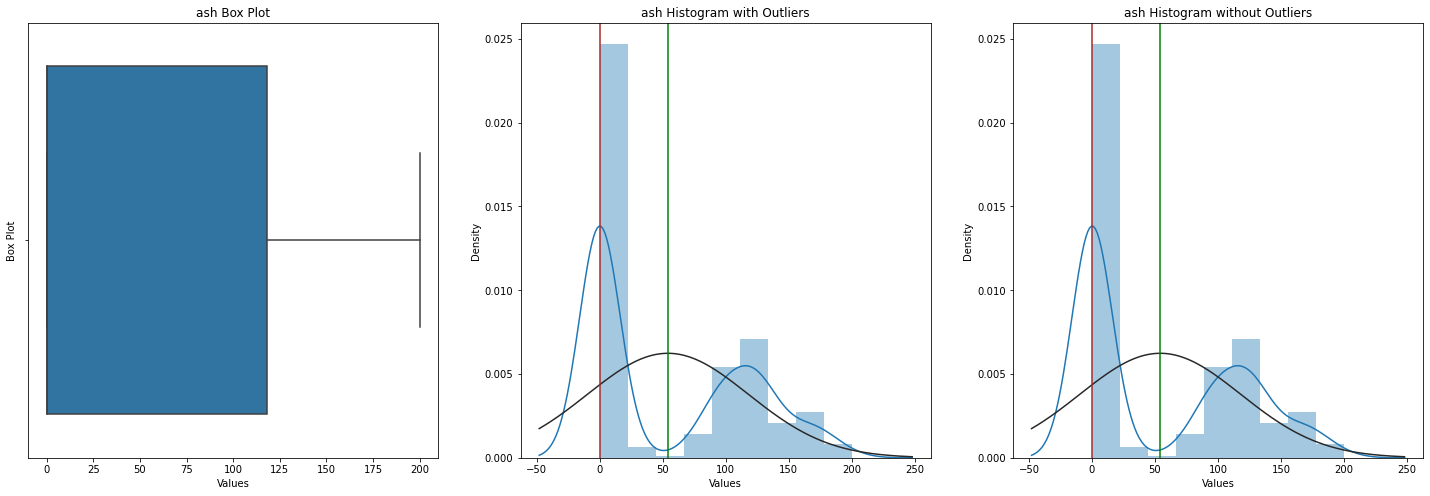

Feature water  have outliers


Total number of outliers in water are 9


Outlier percentage in water is 1.0%




cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
66    237.0   92.0   71.0  247.0           6.0      853.0    695.0   28   
263   236.9   91.7   71.5  246.9           6.0      852.9    695.4   28   
432   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   28   
462   168.0   42.1  163.8  121.8           5.7     1058.7    780.1  100   
587   168.0   42.1  163.8  121.8           5.7     1058.7    780.1    3   
740   140.0  164.0  128.0  237.0           6.0      869.0    656.0   28   
789   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   56   
826   139.7  163.9  127.7  236.7           5.8      868.6    655.6   28   
914   168.0   42.1  163.8  121.8           5.7     1058.7    780.1   14   

     strength  
66      28.63  
263     28.63  
432     24.24  
462     39.23  
587      7.75  
740     35.23  
789     32.85  
826     35.23  
914     17.82

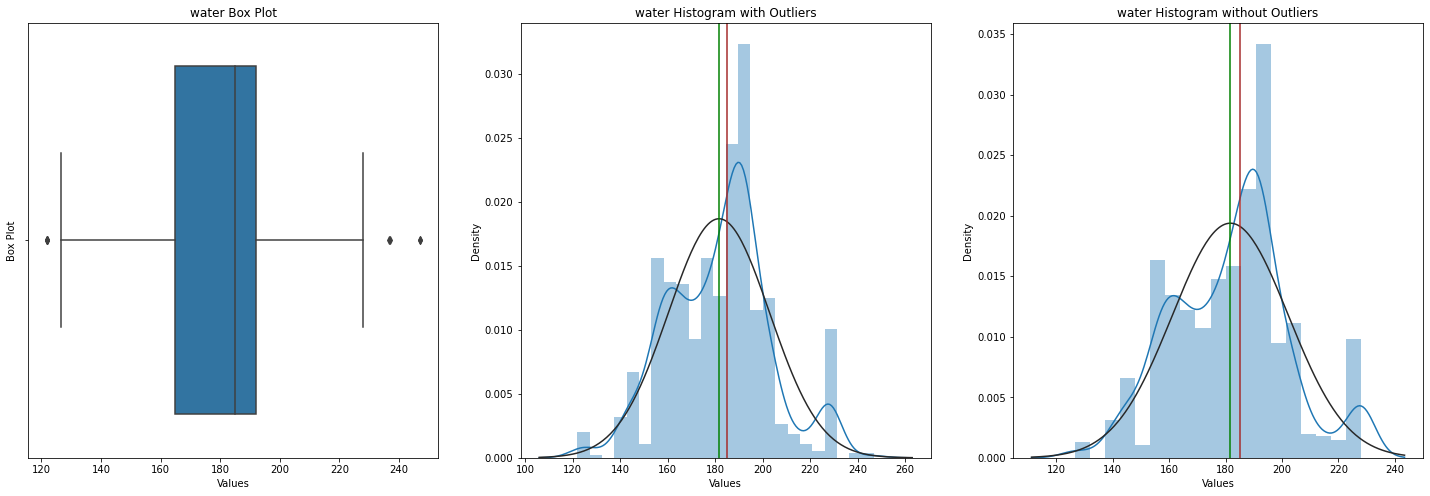

Feature superplastic  have outliers


Total number of outliers in superplastic are 10


Outlier percentage in superplastic is 1.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
44     531.3    0.0  0.0  141.8          28.2      852.1    893.7   91   
156    531.3    0.0  0.0  141.8          28.2      852.1    893.7   28   
232    469.0  117.2  0.0  137.8          32.2      852.1    840.5   56   
292    469.0  117.2  0.0  137.8          32.2      852.1    840.5   91   
538    531.3    0.0  0.0  141.8          28.2      852.1    893.7    7   
744    469.0  117.2  0.0  137.8          32.2      852.1    840.5    7   
816    469.0  117.2  0.0  137.8          32.2      852.1    840.5   28   
838    531.3    0.0  0.0  141.8          28.2      852.1    893.7   56   
955    469.0  117.2  0.0  137.8          32.2      852.1    840.5    3   
1026   531.3    0.0  0.0  141.8          28.2      852.1    893.7    3   

      strength  
44        59.2  
156       56.4  
232       69.3  
292       70.7  
538       46.9  
744       54.9  
816       66.9  
838       58.8  
955       40.2  
1026      41.3

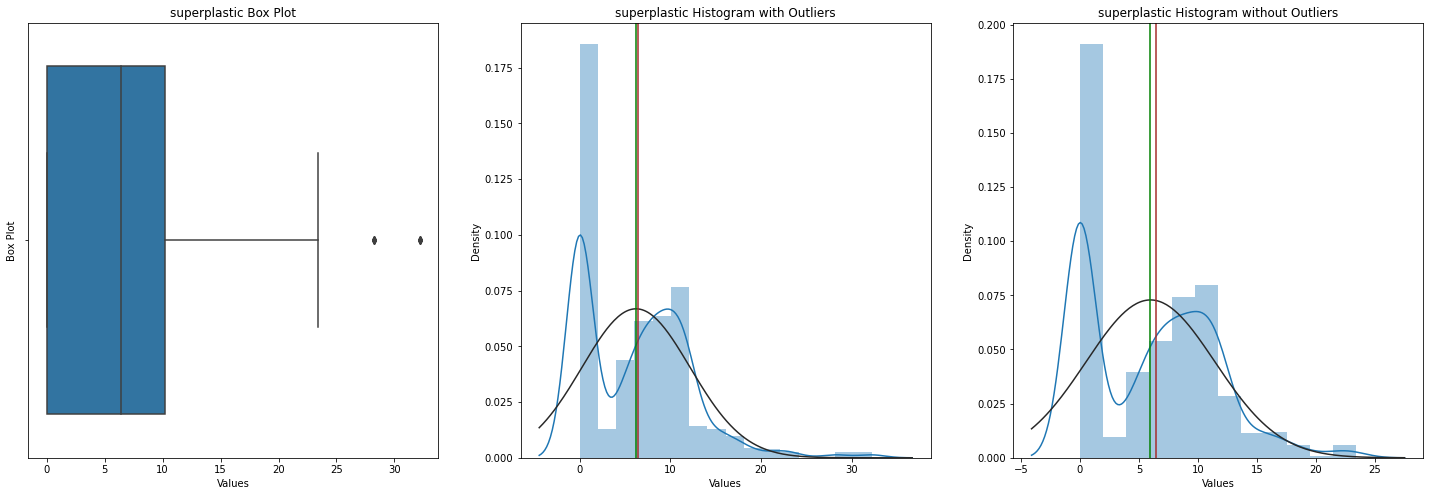

Feature coarseagg does not have any outliers




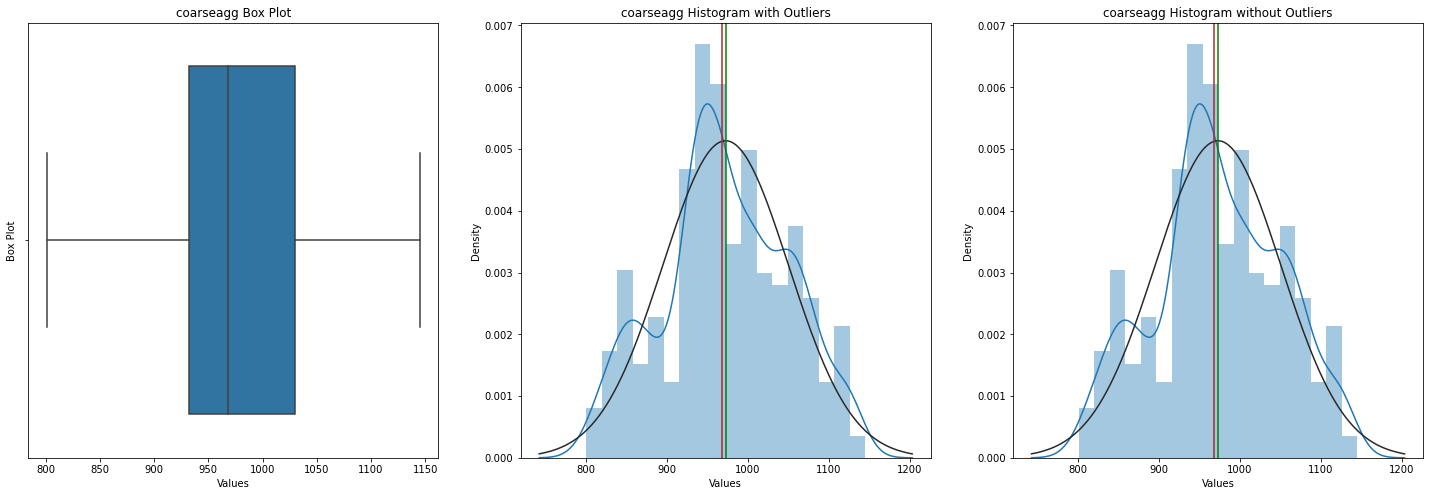

Feature fineagg  have outliers


Total number of outliers in fineagg are 5


Outlier percentage in fineagg is 0.0%




cement  slag  ash  water  superplastic  coarseagg  fineagg  age  strength
129   375.0  93.8  0.0  126.6          23.4      852.1    992.6   91      62.5
447   375.0  93.8  0.0  126.6          23.4      852.1    992.6    7      45.7
504   375.0  93.8  0.0  126.6          23.4      852.1    992.6    3      29.0
584   375.0  93.8  0.0  126.6          23.4      852.1    992.6   56      60.2
857   375.0  93.8  0.0  126.6          23.4      852.1    992.6   28      56.7

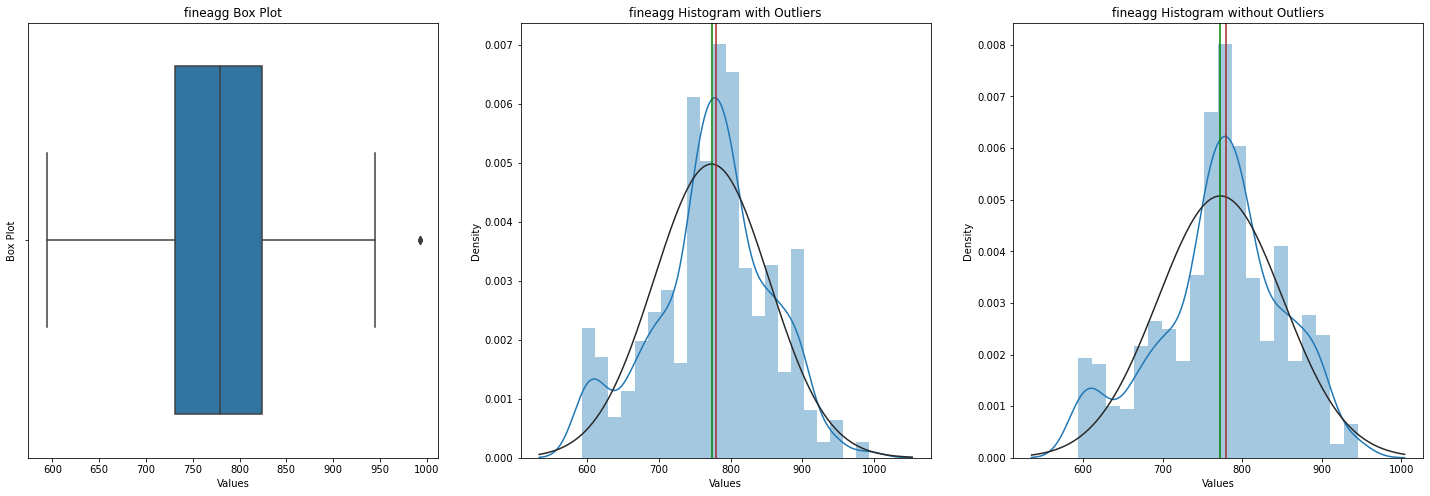

Feature age  have outliers


Total number of outliers in age are 59


Outlier percentage in age is 6.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
51     331.0    0.0  0.0  192.0           0.0      978.0    825.0  180   
64     332.5  142.5  0.0  228.0           0.0      932.0    594.0  365   
93     427.5   47.5  0.0  228.0           0.0      932.0    594.0  180   
99     237.5  237.5  0.0  228.0           0.0      932.0    594.0  180   
103    380.0    0.0  0.0  228.0           0.0      932.0    670.0  180   
133    236.0    0.0  0.0  193.0           0.0      968.0    885.0  365   
144    302.0    0.0  0.0  203.0           0.0      974.0    817.0  180   
149    380.0   95.0  0.0  228.0           0.0      932.0    594.0  270   
152    322.0    0.0  0.0  203.0           0.0      974.0    800.0  180   
157    198.6  132.4  0.0  192.0           0.0      978.4    825.5  360   
159    304.0   76.0  0.0  228.0           0.0      932.0    670.0  365   
198    266.0  114.0  0.0  228.0           0.0      932.0    670.0  365   
199    277.0    0.0  0.0  191.0           0.0      968.0    856.0  180   
207    190.0  190.0  0.0  228.0           0.0      932.0    670.0  180   
256    525.0    0.0  0.0  189.0           0.0     1125.0    613.0  270   
262    266.0  114.0  0.0  228.0           0.0      932.0    670.0  270   
270    500.0    0.0  0.0  200.0           0.0     1125.0    613.0  270   
297    475.0    0.0  0.0  228.0           0.0      932.0    594.0  270   
302    342.0   38.0  0.0  228.0           0.0      932.0    670.0  180   
312    236.0    0.0  0.0  193.0           0.0      968.0    885.0  180   
313    540.0    0.0  0.0  173.0           0.0     1125.0    613.0  270   
323    139.6  209.4  0.0  192.0           0.0     1047.0    806.9  360   
359    475.0    0.0  0.0  228.0           0.0      932.0    594.0  180   
361    277.0    0.0  0.0  191.0           0.0      968.0    856.0  360   
370    266.0  114.0  0.0  228.0           0.0      932.0    670.0  180   
393    342.0   38.0  0.0  228.0           0.0      932.0    670.0  365   
448    331.0    0.0  0.0  192.0           0.0      978.0    825.0  360   
465    427.5   47.5  0.0  228.0           0.0      932.0    594.0  365   
484    237.5  237.5  0.0  228.0           0.0      932.0    594.0  365   
539    304.0   76.0  0.0  228.0           0.0      932.0    670.0  180   
570    190.0  190.0  0.0  228.0           0.0      932.0    670.0  270   
581    525.0    0.0  0.0  189.0           0.0     1125.0    613.0  180   
594    339.0    0.0  0.0  197.0           0.0      968.0    781.0  180   
601    339.0    0.0  0.0  197.0           0.0      968.0    781.0  365   
620    332.5  142.5  0.0  228.0           0.0      932.0    594.0  180   
622    380.0   95.0  0.0  228.0           0.0      932.0    594.0  180   
623    380.0    0.0  0.0  228.0           0.0      932.0    670.0  270   
632    304.0   76.0  0.0  228.0           0.0      932.0    670.0  270   
642    198.6  132.4  0.0  192.0           0.0      978.4    825.5  180   
696    307.0    0.0  0.0  193.0           0.0      968.0    812.0  180   
713    190.0  190.0  0.0  228.0           0.0      932.0    670.0  365   
720    380.0   95.0  0.0  228.0           0.0      932.0    594.0  365   
721    500.0    0.0  0.0  200.0           0.0     1125.0    613.0  180   
754    254.0    0.0  0.0  198.0           0.0      968.0    863.0  365   
755    349.0    0.0  0.0  192.0           0.0     1047.0    806.0  360   
776    540.0    0.0  0.0  173.0           0.0     1125.0    613.0  180   
850    427.5   47.5  0.0  228.0           0.0      932.0    594.0  270   
861    310.0    0.0  0.0  192.0           0.0      970.0    850.0  180   
878    237.5  237.5  0.0  228.0           0.0      932.0    594.0  270   
900    254.0    0.0  0.0  198.0           0.0      968.0    863.0  180   
901    475.0    0.0  0.0  228.0           0.0      932.0    594.0  365   
919    310.0    0.0  0.0  192.0           0.0      970.0    850.0  360   
951    332.5  142.5  0.0  228.0           0.0      932.0    594.0  270   
957    307

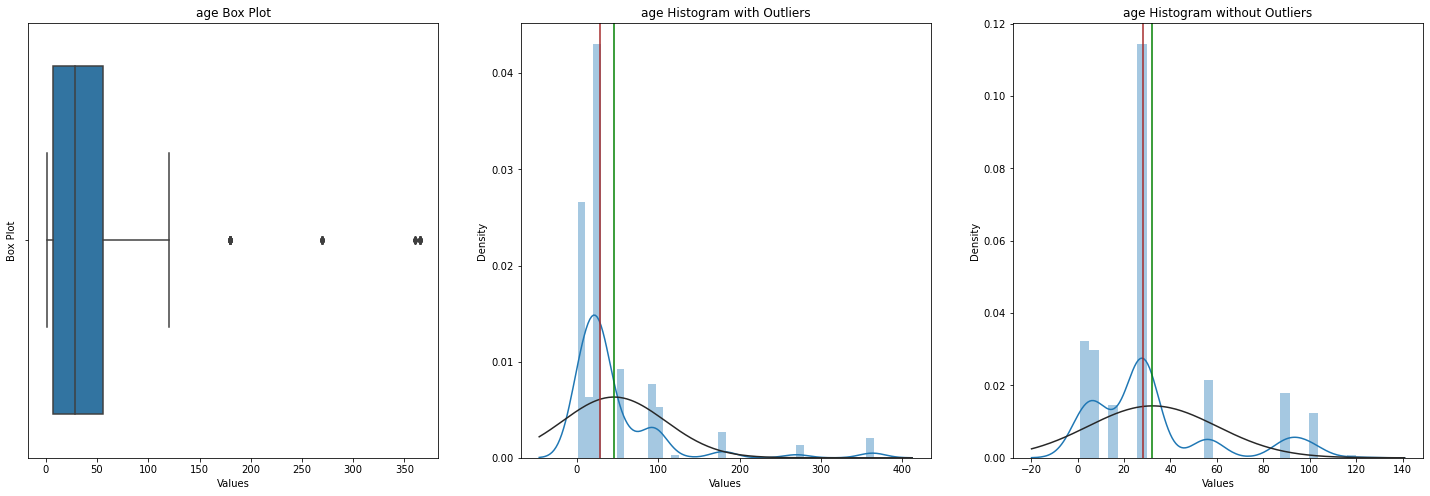

Feature strength  have outliers


Total number of outliers in strength are 4


Outlier percentage in strength is 0.0%




cement   slag  ash  water  superplastic  coarseagg  fineagg  age  \
192    315.0  137.0  0.0  145.0           5.9     1130.0    745.0   28   
732    540.0    0.0  0.0  162.0           2.5     1040.0    676.0   28   
950    389.9  189.0  0.0  145.9          22.0      944.7    755.8   91   
1003   323.7  282.8  0.0  183.8          10.3      942.7    659.9   56   

      strength  
192      81.75  
732      79.99  
950      82.60  
1003     80.20

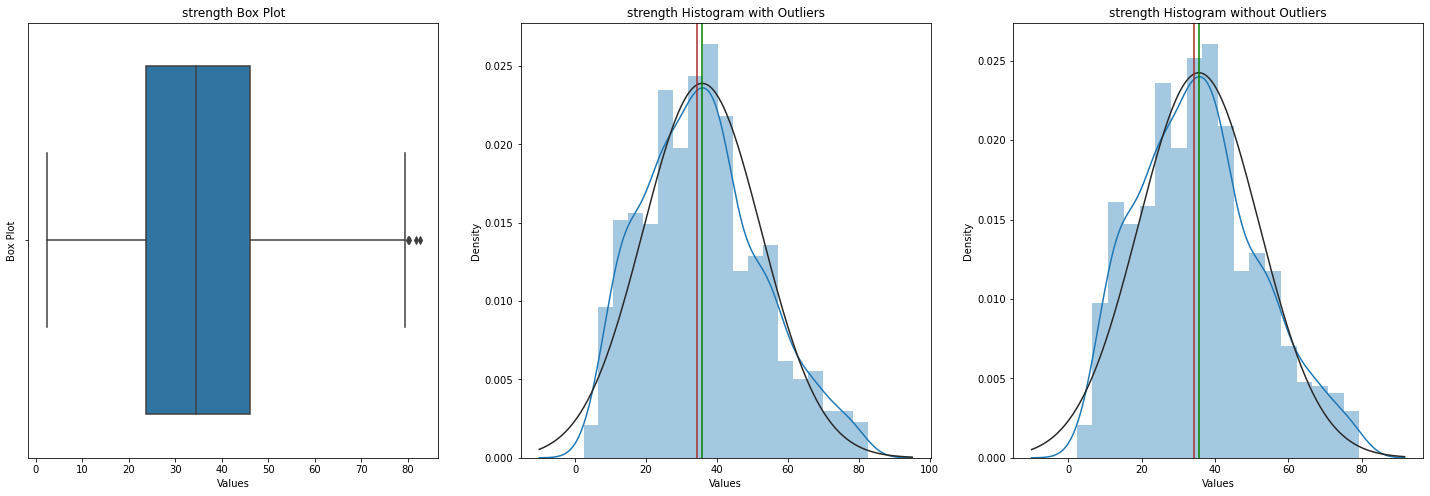

In [11]:
for col in df.columns:
    odt_plots(df, col)
    

# Multivariate analysis using Regresion


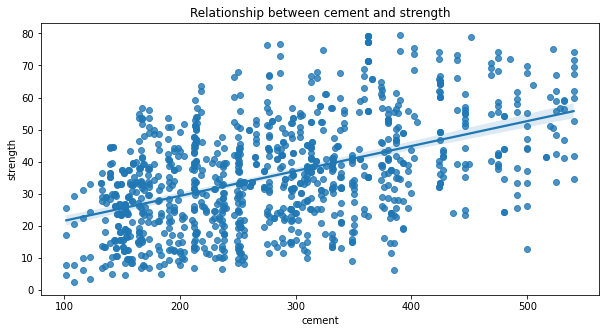

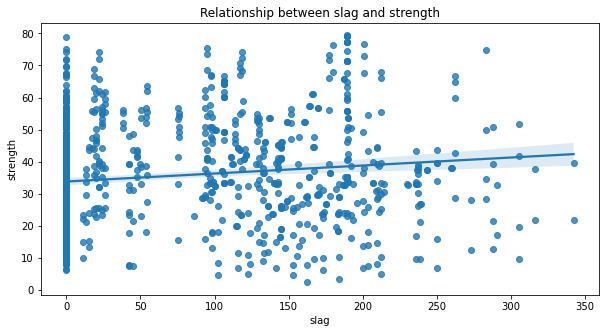

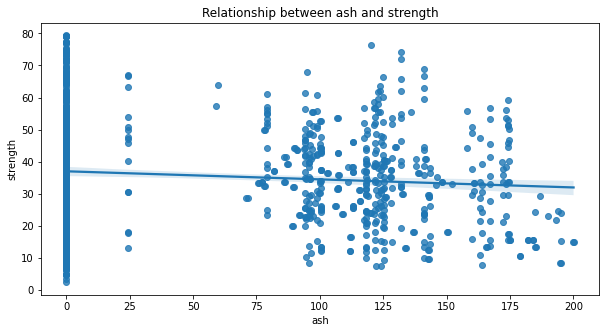

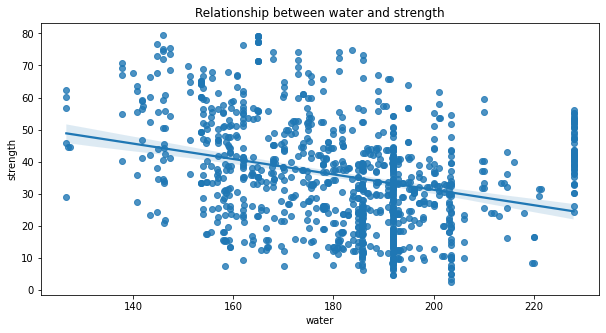

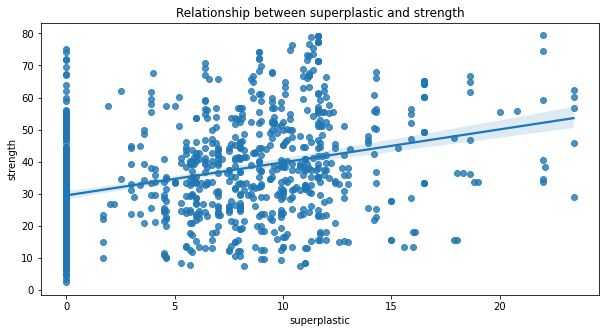

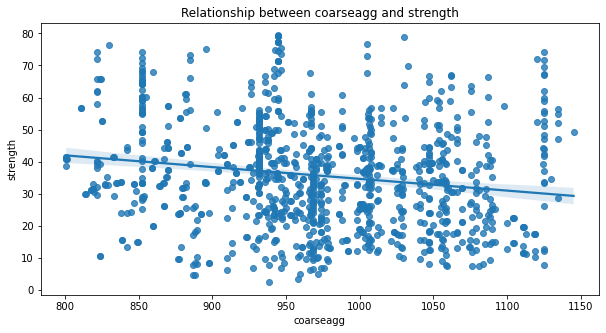

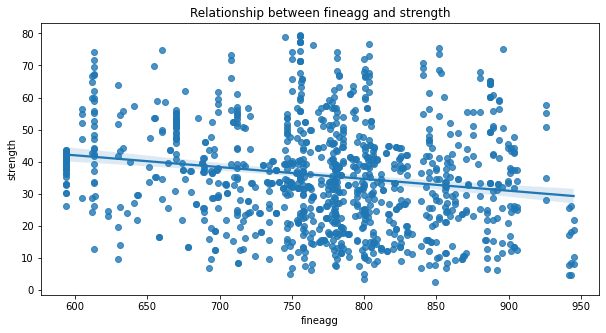

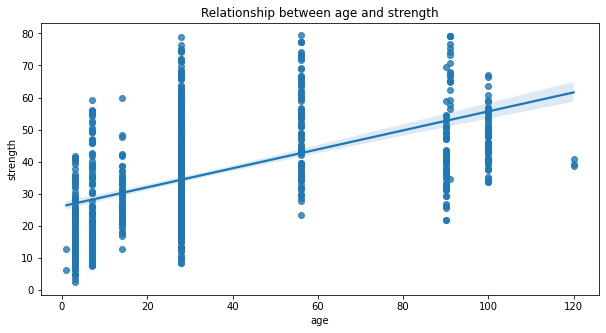

In [12]:
for col in df.columns:
    if col != "strength":
        fig, ax1 = plt.subplots(figsize = (10,5))
        sns.regplot(x = df[col], y =df['strength'], ax= ax1).set_title(f'Relationship between {col} and strength')
        

Analysis from Regression plot
1. Strength and cement are highly positively corelated
2. Strength and slag are slightly positively corelated
3. Strength and ash are slightly negatively corelated
4. Strength and water are highly negatively corelated
5. Strenght and superplastic are highly positively corelated
6. Strength and coarseagg are slightly negatively corelated
7. Strength and fineagg are slightly negatively corelated
8. Strength and age are highly positively corelated

# Multicollinearity test
- Corelation Matrix/Heatmap 

<AxesSubplot:>

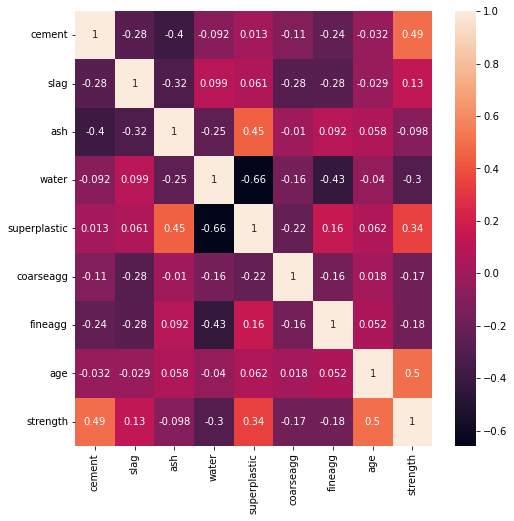

In [13]:
corr = df.corr()
plt.subplots(figsize = (8,8))
sns.heatmap(corr, annot = True)

Analysis/result from stage 1 test:
1. Slag has corelation with ash
2. Ash has high corelation with cement, superplastic
3. Water has high corelation with superplastic, fineagg
4. Superplastic has high corelation with ash

- Many feature have corelation more than 30%, so we can conclude from stage 1 result that there is a chance of multicollinearity in our data

# VIF (Variance Inflation Factor)
- Formula for VIF is 
VIF = 1/(1-R2)
R2 stands for r square.
r square helps to understand how well an independent variable helps with prediction of dependent variable. More the better
- Step 1: 
Regress every independent variable with each other calculate the R2.
- Step 2:
Find VIF using above formula
-Step 3:
If VIF is more than 5 we say that multicollinearity exist. 

In [14]:
def VIF(features):
    vif = pd.DataFrame() # Creating a blank data frame
    vif["vif"] = [variance_inflation_factor(features,i) for i in range(features.shape[1])] # VIF column creation
    vif["Features"] = features.columns
    return vif

In [15]:
VIF(df.drop('strength', axis=1))

vif      Features
0  14.291158        cement
1   3.342314          slag
2   4.415840           ash
3  81.963087         water
4   5.724145  superplastic
5  86.938582     coarseagg
6  68.664404       fineagg
7   2.368372           age

In [16]:
def calculate_vif(dataset):
    vif = pd.DataFrame()
    vif['features'] = dataset.columns
    vif['VIF_Values'] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif['VIF_Values'] = round(vif['VIF_Values'], 2)
    vif = vif.sort_values(by = 'VIF_Values', ascending=False) #Try ascending order as assginment
    return (vif)


In [17]:
calculate_vif(df.drop('strength', axis=1))

features  VIF_Values
5     coarseagg       86.94
3         water       81.96
6       fineagg       68.66
0        cement       14.29
4  superplastic        5.72
2           ash        4.42
1          slag        3.34
7           age        2.37

In [18]:
def correlation_with_target(data, t_col):
    independant_variable = data.drop(t_col, axis = 1).columns
    corr_result = []
    for col in independant_variable:
        corr_result.append(data[t_col].corr(data[col]))
    result = pd.DataFrame([independant_variable, corr_result], index = ['Independant Variable', 'Correlation']).T
    result.sort_values(by = 'Correlation', ascending=False)
    return result

In [19]:
correlation_with_target(df, 'strength')

Independant Variable Correlation
0               cement    0.493518
1                 slag    0.129561
2                  ash   -0.097973
3                water   -0.300043
4         superplastic    0.342633
5            coarseagg   -0.173234
6              fineagg   -0.176113
7                  age    0.499711

Analysis:
1. Age and cement have 49% correlation strength
2. Superplastic and water have 34% and 30%(-ve) respectively.

# Applying PCA to treat multicollineatiry
1. Dimensionality reduction
2. Reduce computational cost
3. Saving memory

In [20]:
def custom_pca(X):
    n_comp = len(X.columns)
    #Applying standard scaler for feature scaling
    sc = StandardScaler()
    X = sc.fit_transform(X)
    
    for i in range(1, n_comp):
        pca = PCA(n_components = i)
        p_comp = pca.fit_transform(X)
        evr = np.cumsum(pca.explained_variance_ratio_) # It helps to decide no. of principle components needed and is the % of information extracted from decomposed features
        if evr[i-1] > 0.9:
            pcs = i
            break
    print('Explained Variance ratio after PCA is:  ', evr)
    
    #Creating a dataframe of principle components
    col = []
    for j in range(1, pcs+1):
        col.append('PC_'+str(j))
    pca_df = pd.DataFrame(p_comp, columns = col)
    return pca_df
        

In [21]:
pca_df = custom_pca(df.drop('strength', axis =1))

Explained Variance ratio after PCA is:   [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [22]:
pca_df.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6
0  1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110
1 -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061
2 -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045
3  2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548
4  0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228

# Joining PCA features with target features

In [23]:
pca_df =  pca_df.join(df['strength'], how = 'left')

In [24]:
pca_df.head()

PC_1      PC_2      PC_3      PC_4      PC_5      PC_6  strength
0  1.810919  1.331664 -1.284484 -0.306148 -0.067652 -0.886110     29.89
1 -1.823833 -0.573436 -1.058973  0.893130 -0.913984 -0.751061     23.51
2 -0.739819 -0.463200 -0.541643 -1.033210 -0.308068  0.611045     29.22
3  2.766368  0.602978 -0.512532  0.008806  0.086415  0.850548     45.85
4  0.892523  0.966627 -0.863624  1.148561 -0.064439 -1.221228     18.29

In [25]:
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

Model building
-Stages of model building
1. Custom train and split function
2. To perform Cross validation
3. To do Hyperparameter tuning

In [26]:
def train_and_test_split(data, tcol, testSize = 0.3, randomState = 3):
    X = data.drop(tcol, axis = 1)
    y = data[tcol]
    return train_test_split(X, y, test_size = testSize, random_state = randomState)

In [27]:
def model_builder(model_name, model, data, t_col):
    X_train, X_test, y_train, y_test = train_and_test_split(data, t_col)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    result = [model_name, rmse, r2]
    return result


In [28]:
model_builder(model_name = 'Linear Regression', model = LinearRegression(), data = pca_df, t_col = 'strength')

['Linear Regression', 9.098029413143959, 0.7005612990763813]

In [29]:
def multiple_models(data, t_col):
    col_names = ['Model Name', 'RMSE', 'R2 Score']
    result = pd.DataFrame(columns = col_names)
    result.loc[len(result)] = model_builder('Linear Regression', LinearRegression(), pca_df, t_col)
    result.loc[len(result)] = model_builder('Lasso', Lasso(), pca_df, t_col)
    result.loc[len(result)] = model_builder('Ridge', Ridge(), pca_df, t_col)
    result.loc[len(result)] = model_builder('Decision Tree Regressor', DecisionTreeRegressor(), pca_df, t_col)
    result.loc[len(result)] = model_builder('SVR', SVR(), pca_df, t_col)
    result.loc[len(result)] = model_builder('k Neighbours Regressor', KNeighborsRegressor(), pca_df, t_col)
    result.loc[len(result)] = model_builder('Random Forest Regressor', RandomForestRegressor(), pca_df, t_col)
    result.loc[len(result)] = model_builder('Ada Boost Regressor', AdaBoostRegressor(), pca_df, t_col)
    result.loc[len(result)] = model_builder('Gradient Boosting Regressor', GradientBoostingRegressor(), pca_df, t_col)
    result.loc[len(result)] = model_builder('XGB Regressor', XGBRegressor(), pca_df, t_col)
    return result

In [30]:
multiple_models(pca_df, 'strength')

Model Name      RMSE  R2 Score
0            Linear Regression  9.098029  0.700561
1                        Lasso  9.494112  0.673922
2                        Ridge  9.099976  0.700433
3      Decision Tree Regressor  8.918459  0.712265
4                          SVR  9.123982  0.698851
5       k Neighbours Regressor  7.798882  0.779972
6      Random Forest Regressor  6.311227  0.855908
7          Ada Boost Regressor  8.838892  0.717376
8  Gradient Boosting Regressor  6.667132  0.839198
9                XGB Regressor  5.952696  0.871814

In [31]:
def k_fold_cv(X,y,fold=10):
    score_LR = cross_val_score(LinearRegression(),X,y,cv=fold)
    score_LS = cross_val_score(Lasso(),X,y,cv=fold)
    score_RD = cross_val_score(Ridge(),X,y,cv=fold)
    score_DT = cross_val_score(DecisionTreeRegressor(),X,y,cv=fold)
    score_SR = cross_val_score(SVR(),X,y,cv=fold)
    score_KNN = cross_val_score(KNeighborsRegressor(),X,y,cv=fold)
    score_RF = cross_val_score(RandomForestRegressor(),X,y,cv=fold)
    score_AB = cross_val_score(AdaBoostRegressor(),X,y,cv=fold)
    score_GB = cross_val_score(GradientBoostingRegressor(),X,y,cv=fold)
    score_XGB = cross_val_score(XGBRegressor(),X,y,cv=fold)
    
    
    model_name = ['Linear Regression', 'Lasso', 'Ridge', 'DTR' , 'SVR' , 'Random Forest' , 'KNN', 'Gboost' , 'XGBoost' , 'AdaBoost']
    scores = [score_LR, score_LS, score_RD, score_DT, score_SR, score_KNN, score_RF, score_AB, score_GB, score_XGB]
    result=[]
    for i in range (len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name, score_mean, score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result,columns=['Mode_Name', 'CV Accuracy', 'CV STD'])
    return k_fold_df.sort_values('CV Accuracy',ascending=False)


In [32]:
k_fold_cv(pca_df.drop('strength', axis=1), pca_df['strength'])

Mode_Name  CV Accuracy    CV STD
9           AdaBoost     0.873262  0.036061
6                KNN     0.867605  0.030774
8            XGBoost     0.828554  0.050266
5      Random Forest     0.768286  0.056058
3                DTR     0.760401  0.048679
7             Gboost     0.727347  0.034135
4                SVR     0.703117  0.042765
2              Ridge     0.663935  0.059437
0  Linear Regression     0.663928  0.059476
1              Lasso     0.649837  0.049887

## HyperParameter Tuning ( increases accuracy)

In [33]:
def tuning(X,y,fold=10):
    param_LAS = {'alpha':[1e-15, 1e-13, 1e-11, 1e-9, 1e-7, 1e-5, 1e-3, 1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300,400,500]}
    param_KNN = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]}
    param_DTR = {'max_depth' : [3,5,7,9,10,12,14,16] , 'max_features' : ['auto', 'log2', 'sqrt', 2,3,4,5,6]}
    param_SVR = {'gamma' : ['scale' , 'auto'], 'C' : [0.5 , 1]}
    param_ADB = {'learning_rate' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_GB = {'alpha' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_XGB = {'eta' : [0.1,0.2,0.3,0.4,0.5], 'max_depth' : [3,5,7,9,10,12,14,15,16], 'gamma' : [0,10,20,30,40,50,60,70,80,90,100,200,300,400,500], 'reg_lambda' : [0,1]}
    param_RF = {'max_depth' : [3,5,7,8,9,10,12,14,16], 'max_features' : ['auto', 'log2', 'sqrt', 2,3,4,5,6]}
    
    ##HyperParameter Tuning
    tune_LAS = GridSearchCV(Lasso(),param_LAS,cv=fold)
    tune_RID = GridSearchCV(Ridge(), param_LAS , cv = fold)
    tune_KNN = GridSearchCV(KNeighborsRegressor() , param_KNN , cv = fold)
    tune_DT = GridSearchCV(DecisionTreeRegressor(), param_DTR , cv = fold)
    tune_SVR = GridSearchCV(SVR(), param_SVR , cv = fold)
    tune_ADB = GridSearchCV(AdaBoostRegressor() , param_ADB , cv = fold)
    tune_GB = GridSearchCV(GradientBoostingRegressor() , param_GB , cv = fold)
    tune_XGB = GridSearchCV(XGBRegressor() , param_XGB , cv = fold)
    tune_RF = GridSearchCV(RandomForestRegressor() , param_RF , cv = fold)
    
    ##Fitting X and Y
    tune_LAS.fit(X,y)
    tune_RID.fit(X,y)
    tune_KNN.fit(X,y)
    tune_DT.fit(X,y)
    tune_SVR.fit(X,y)
    tune_ADB.fit(X,y)
    tune_GB.fit(X,y)
    tune_XGB.fit(X,y)
    tune_RF.fit(X,y)
    
    tune = [tune_LAS, tune_RID, tune_KNN, tune_DT, tune_SVR, tune_ADB, tune_GB, tune_XGB, tune_RF]
    models = ['Lasso', 'Ridge', 'KNN' , 'DTR', 'SVR' , 'ADBR', 'GBR', 'XGBR' , 'RFR']
    
    for i in range(len(tune)):
        print('Models:', models[i])
        print('Best Parameters:', tune[i].best_params_)





In [34]:
#tuning(pca_df.drop('strength', axis=1), pca_df['strength'])

## Cross Validation Post HyperParameter Tuning


In [43]:
def cv_post_hpt(X,y,fold=10):
    score_LR = cross_val_score(LinearRegression(),X,y,cv=fold)
    score_LS = cross_val_score(Lasso(alpha=0.1),X,y,cv=fold)
    score_RD = cross_val_score(Ridge(alpha=6),X,y,cv=fold)
    score_DT = cross_val_score(DecisionTreeRegressor(max_depth=12),X,y,cv=fold)
    score_SR = cross_val_score(SVR(C=1),X,y,cv=fold)
    score_KNN = cross_val_score(KNeighborsRegressor(),X,y,cv=fold)
    score_RF = cross_val_score(RandomForestRegressor(),X,y,cv=fold)
    score_AB = cross_val_score(AdaBoostRegressor(learning_rate=0.6),X,y,cv=fold)
    score_GB = cross_val_score(GradientBoostingRegressor(alpha=0.9),X,y,cv=fold)
    score_XGB = cross_val_score(XGBRegressor(eta=0.2),X,y,cv=fold)
    
    model_name = ['Linear Regression', 'Lasso', 'Ridge', 'DTR' , 'SVR' , 'KNN', 'Random Forest' ,'AdaBost' , 'Gboost' , 'XGBoost' ,]
    scores = [score_LR, score_LS, score_RD, score_DT, score_SR, score_KNN, score_RF, score_AB, score_GB, score_XGB]
    
    result = []
    for i in range (len(model_name)):
        score_mean = np.mean(scores[i])
        score_std = np.std(scores[i])
        m_name = model_name[i]
        temp = [m_name, score_mean, score_std]
        result.append(temp)
    k_fold_df = pd.DataFrame(result,columns=['Mode_Name', 'CV Accuracy', 'CV STD'])
    return k_fold_df.sort_values('CV Accuracy', ascending=False)
   

In [44]:
cv_post_hpt(pca_df.drop('strength', axis=1), pca_df['strength'])

Mode_Name  CV Accuracy    CV STD
9            XGBoost     0.872393  0.035963
6      Random Forest     0.867717  0.032792
8             Gboost     0.829236  0.050274
3                DTR     0.772299  0.062377
5                KNN     0.768286  0.056058
7            AdaBost     0.724486  0.041805
4                SVR     0.703117  0.042765
1              Lasso     0.664143  0.058426
2              Ridge     0.663951  0.059242
0  Linear Regression     0.663928  0.059476

In [45]:
k_fold_cv(pca_df.drop('strength', axis=1), pca_df['strength'])

Mode_Name  CV Accuracy    CV STD
9           AdaBoost     0.873262  0.036061
6                KNN     0.865326  0.031811
8            XGBoost     0.829130  0.050238
5      Random Forest     0.768286  0.056058
3                DTR     0.762775  0.060372
7             Gboost     0.732194  0.035946
4                SVR     0.703117  0.042765
2              Ridge     0.663935  0.059437
0  Linear Regression     0.663928  0.059476
1              Lasso     0.649837  0.049887

## Clustering 
 - Using Kmeans clustering to check if accuracy can be improved any further

<AxesSubplot:xlabel='cement', ylabel='strength'>

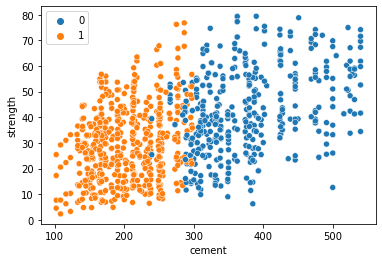

In [48]:
kmeans = KMeans(n_clusters=2, random_state=2)
clusters = kmeans.fit_predict(df.drop('strength',axis=1))
sns.scatterplot(x=df['cement'],y=df['strength'],hue=clusters)

In [49]:
# This will help my model to understand the data better 
# - Ultimately it will help us to improve our accuracy
# - Add column in my dataset which will help me predict my Y better

In [51]:
def clustering(X,tcol,clusters):
    column = list(set(list(X.columns))-set(X['strength']))
    r = int(len(column)/2)
    if r%2 == 0:
        r = r 
    else:
        r += 1
    f, ax = plt.subplots(r,2, figsize = (15,15))
    a = 0
    for row in range(r):
        for col in range(0,2):
            if a != len(column):
                ax[row][col].scatter(X[tcol], X[column[a]], c = clusters)
                ax[row][col].set_xlabel(tcol)
                ax[row][col].set_ylabel(column[a])
                a += 1
                
#Plotting clusters between all the independent columns and strength


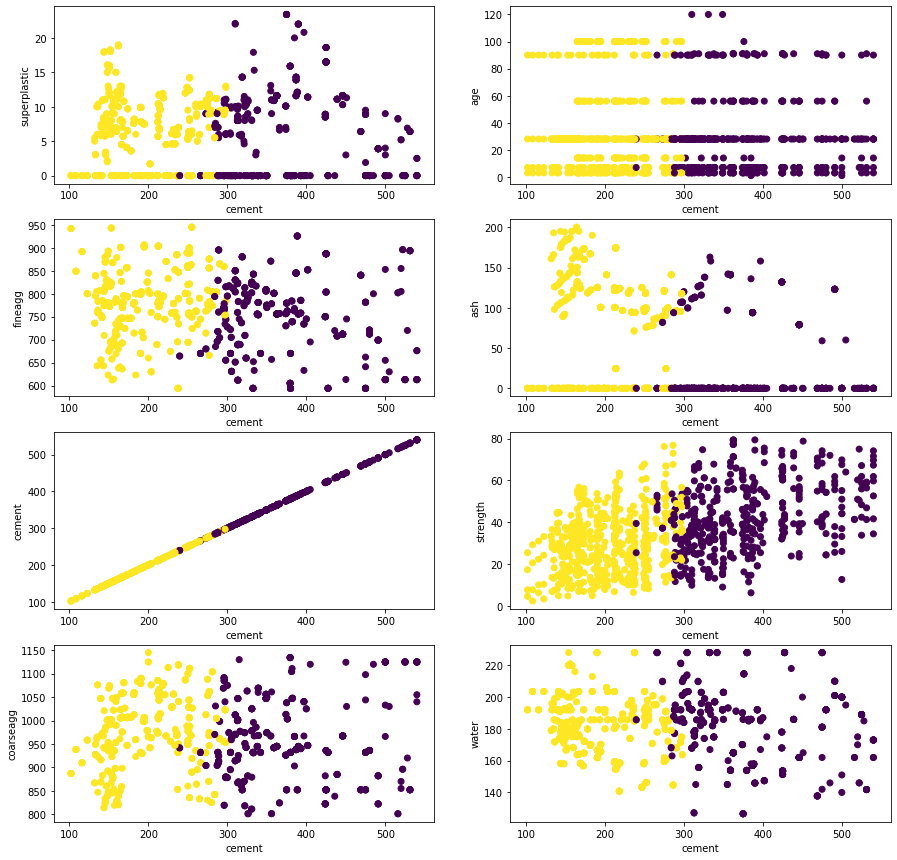

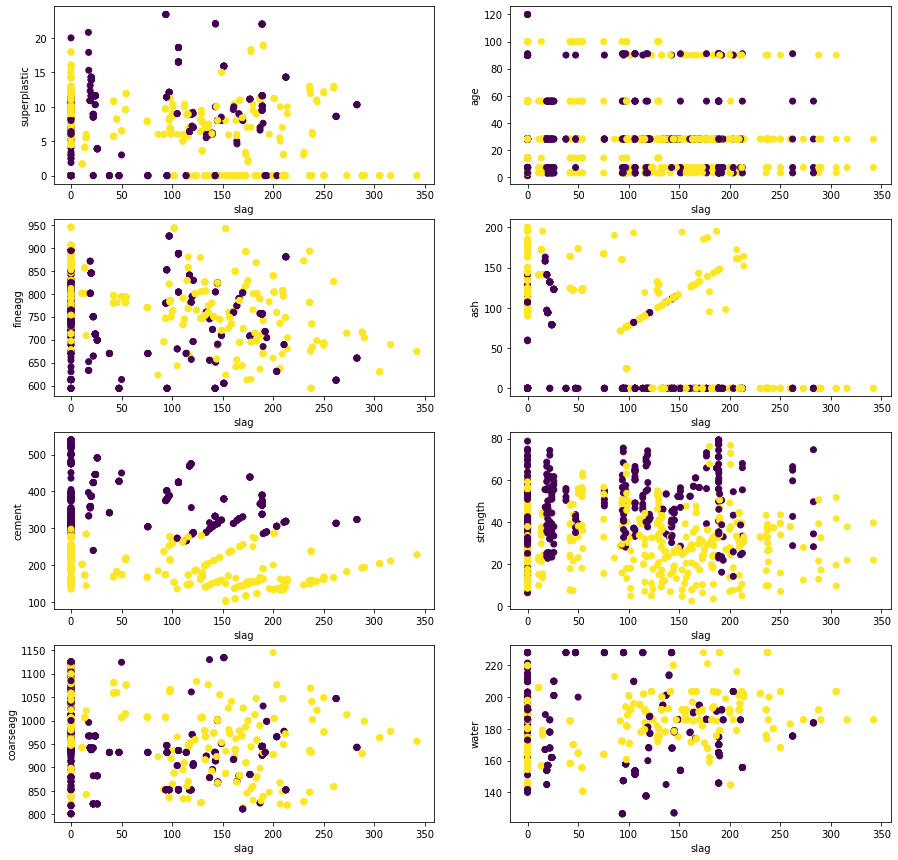

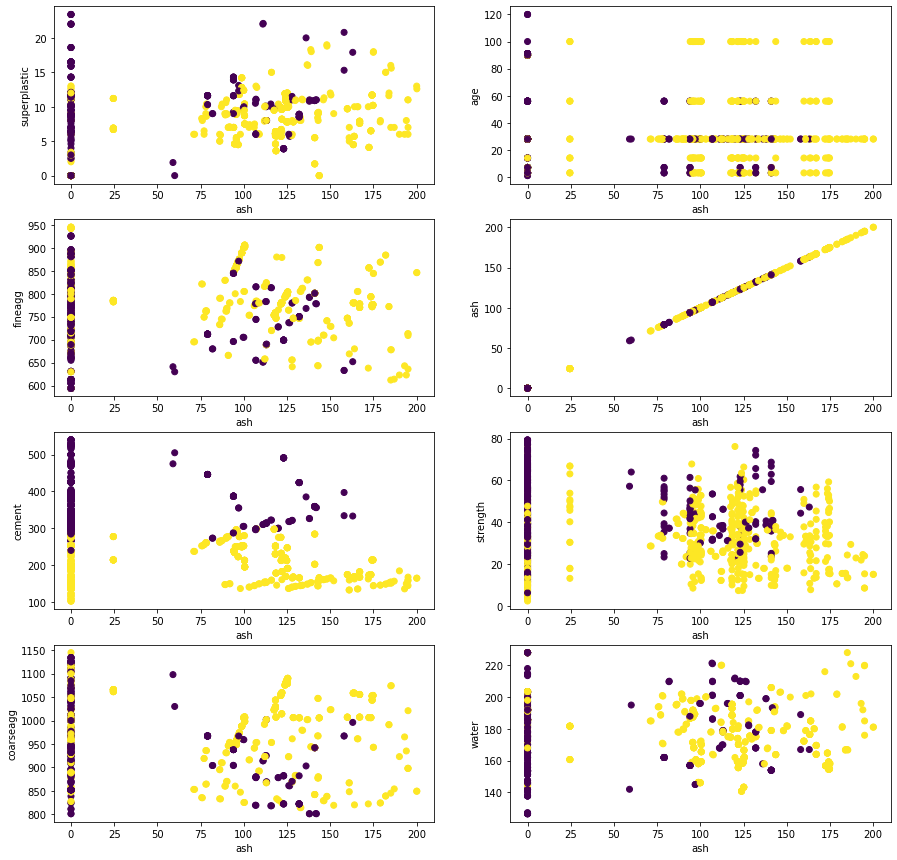

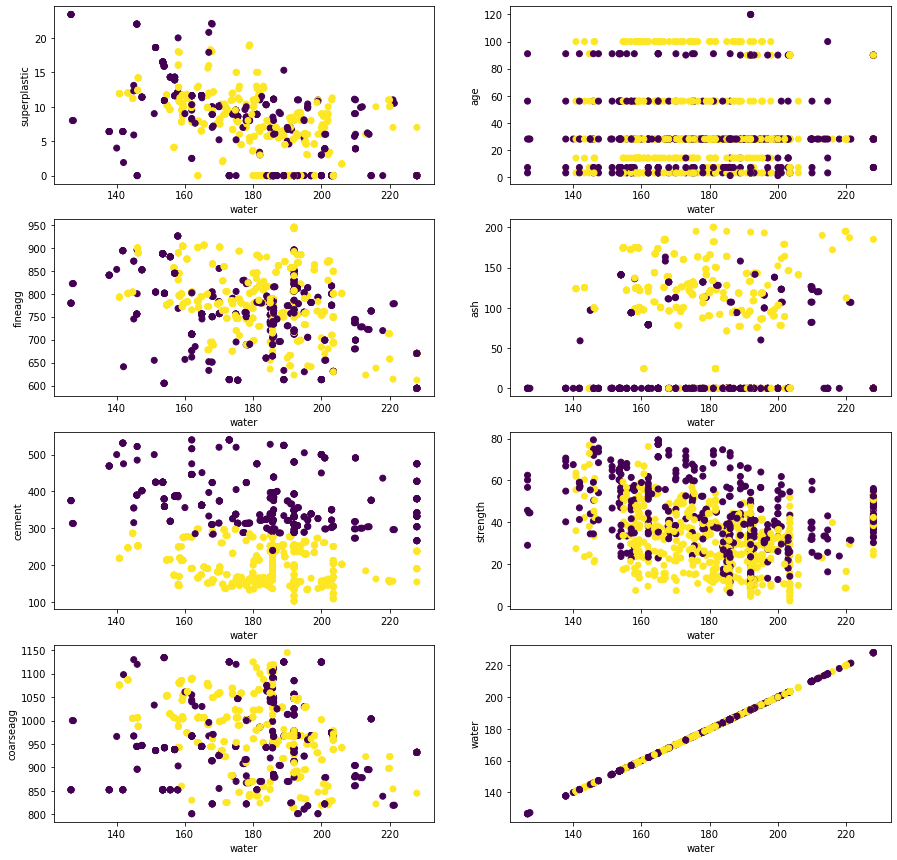

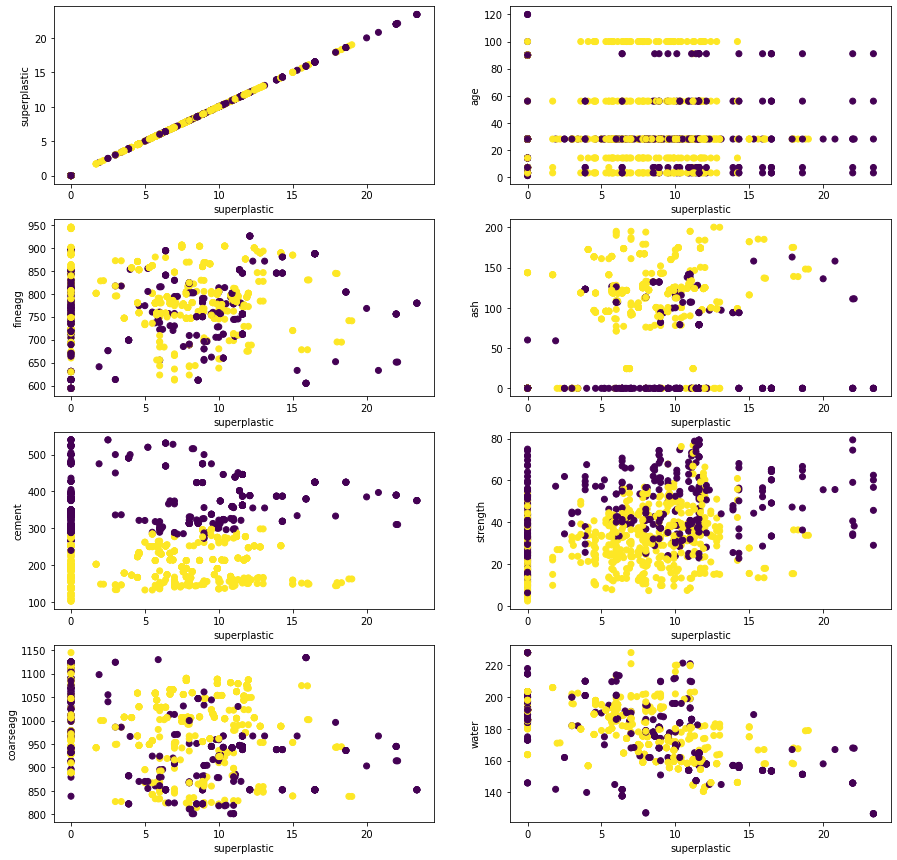

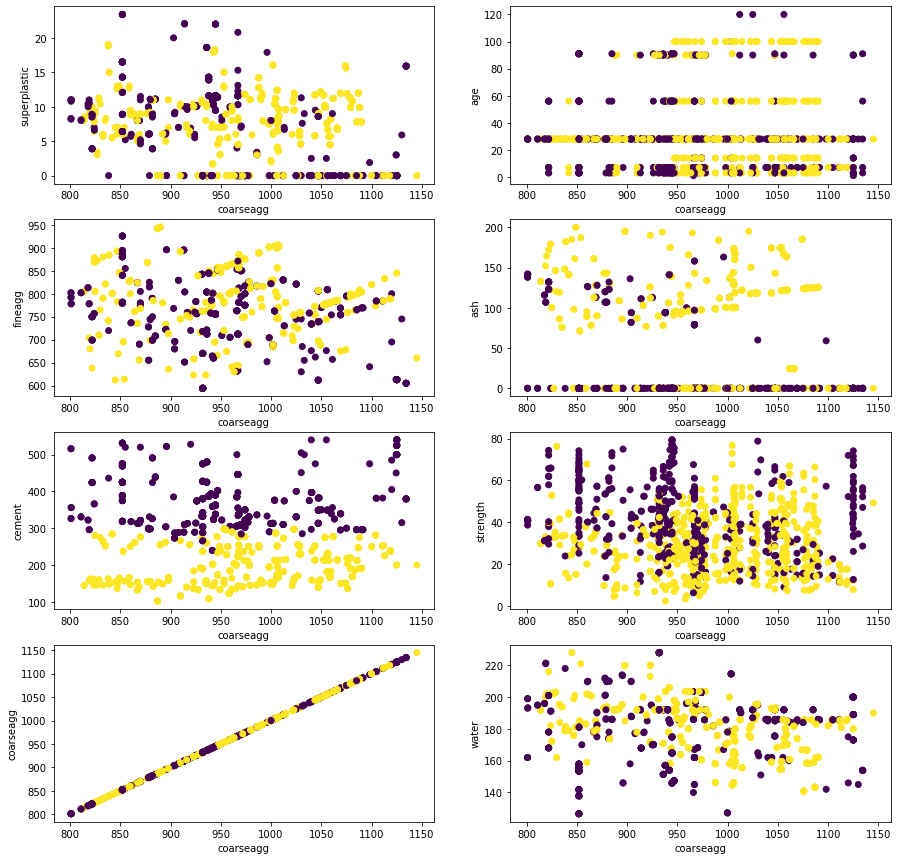

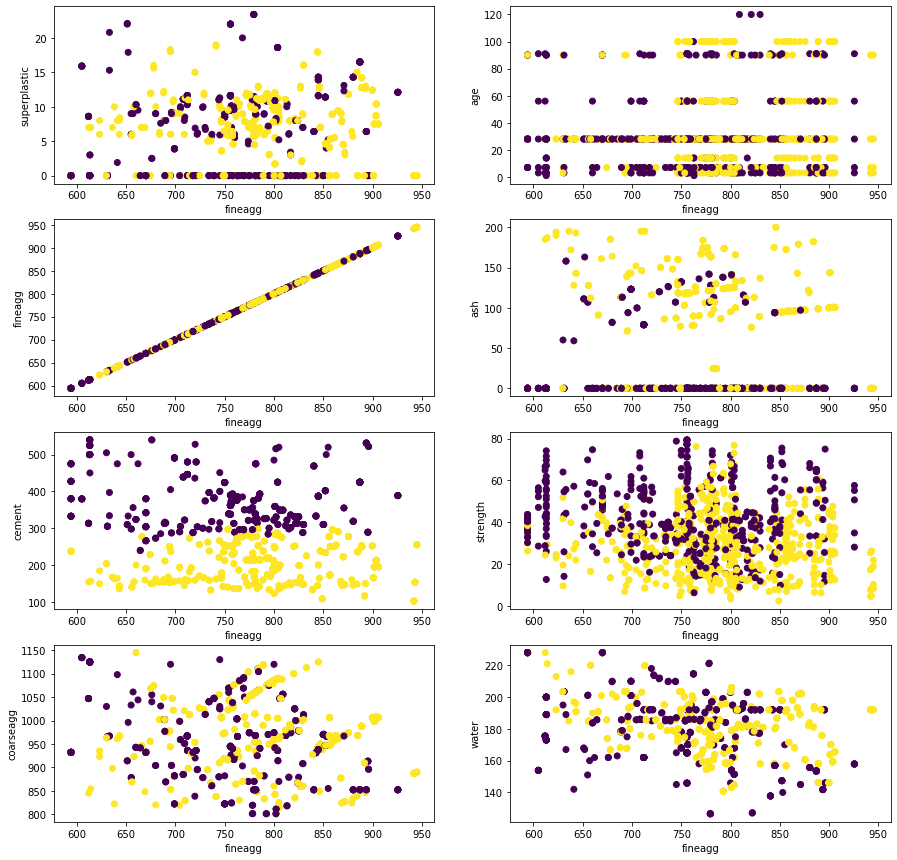

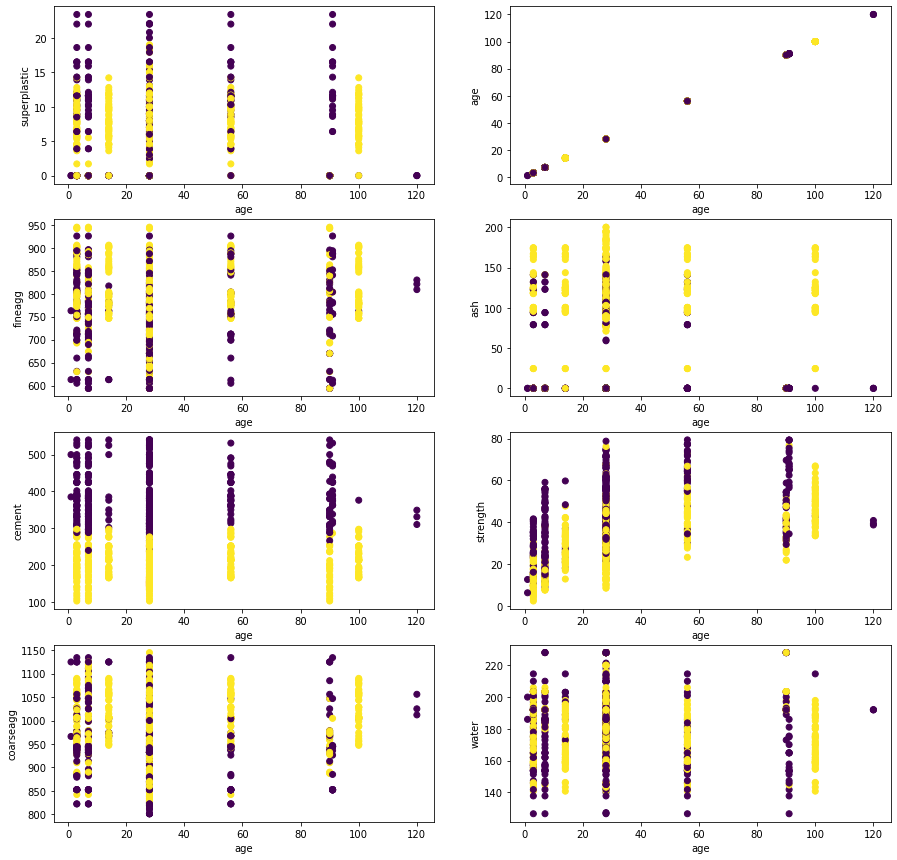

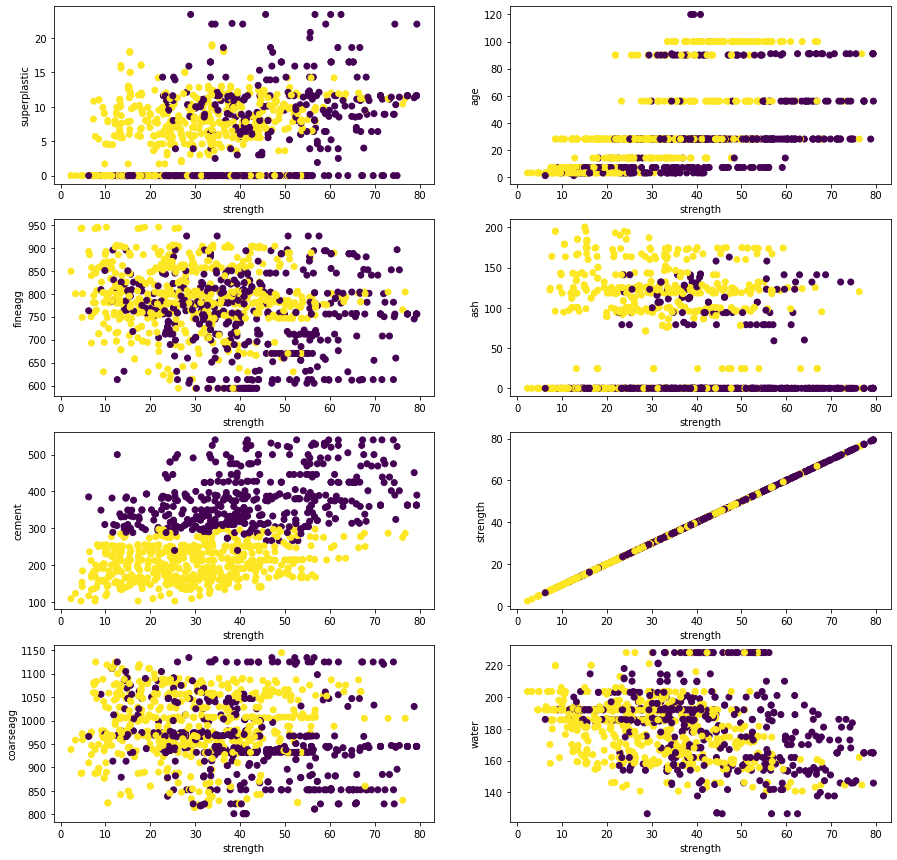

In [53]:
X = df.drop('strength', axis=1)
for col in df.columns:
    clustering(df,col,clusters)

## Analysis: 
    - Cement is forming clusters with other independent variables

In [54]:
new_df = df.join(pd.DataFrame(clusters , columns = ['clusters']), how = 'left')
new_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  clusters  
0     29.89         1  
1     23.51         1  
2     29.22         1  
3     45.85         0  
4     18.29         1

In [55]:
new_df['clusters'].value_counts()

1    567
0    463
Name: clusters, dtype: int64

In [56]:
clusters_agg = new_df.groupby('clusters')['cement'].agg(['mean', 'median'])
clusters_agg


mean  median
clusters                    
0         376.731317   362.6
1         203.132804   202.0

In [57]:
clusters_df = new_df.merge(clusters_agg,on='clusters',how='left')
clusters_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  clusters        mean  median  
0     29.89         1  203.132804   202.0  
1     23.51         1  203.132804   202.0  
2     29.22         1  203.132804   202.0  
3     45.85         0  376.731317   362.6  
4     18.29         1  203.132804   202.0

In [59]:
multiple_models(clusters_df.drop('clusters',axis=1),'strength')

Model Name      RMSE  R2 Score
0            Linear Regression  9.098029  0.700561
1                        Lasso  9.494112  0.673922
2                        Ridge  9.099976  0.700433
3      Decision Tree Regressor  8.861937  0.715900
4                          SVR  9.123982  0.698851
5       k Neighbours Regressor  7.798882  0.779972
6      Random Forest Regressor  6.245872  0.858876
7          Ada Boost Regressor  8.732820  0.724119
8  Gradient Boosting Regressor  6.663936  0.839352
9                XGB Regressor  5.952696  0.871814

In [58]:
X = clusters_df.drop(['strength','clusters'], axis=1)
y = clusters_df['strength']
k_fold_cv(X,y)

Mode_Name  CV Accuracy    CV STD
9           AdaBoost     0.899436  0.046856
6                KNN     0.888978  0.035643
8            XGBoost     0.875770  0.044864
3                DTR     0.833683  0.049901
7             Gboost     0.741621  0.036352
0  Linear Regression     0.686721  0.062347
2              Ridge     0.686641  0.062314
1              Lasso     0.686437  0.062413
5      Random Forest     0.669227  0.087720
4                SVR     0.246843  0.044778

In [60]:
cv_post_hpt(X,y)

Mode_Name  CV Accuracy    CV STD
9            XGBoost     0.902852  0.038479
6      Random Forest     0.886176  0.035990
8             Gboost     0.875653  0.044941
3                DTR     0.826503  0.052572
7            AdaBost     0.741240  0.034118
0  Linear Regression     0.686721  0.062347
1              Lasso     0.686641  0.062319
2              Ridge     0.686641  0.062315
5                KNN     0.669227  0.087720
4                SVR     0.246843  0.044778

## Understanding Feature Importance using xgboost

In [61]:
x_train, x_test, y_train, y_test = train_and_test_split(clusters_df.drop(['clusters'],axis=1),'strength')

In [62]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

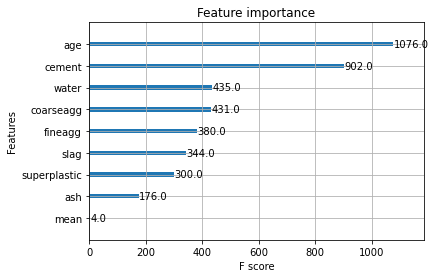

In [63]:
xgboost.plot_importance(xgb)

## Analysis:
    - Age and Cement are the 2 most important features for predicting strength of the mixture

In [64]:
imp_features = clusters_df[['age','cement','water','coarseagg','fineagg','strength']]

In [65]:
cv_post_hpt(imp_features.drop('strength' , axis = 1) , imp_features['strength'])

Mode_Name  CV Accuracy    CV STD
9            XGBoost     0.884666  0.044019
6      Random Forest     0.866549  0.036729
8             Gboost     0.841520  0.040805
3                DTR     0.794921  0.082135
7            AdaBost     0.699701  0.043066
1              Lasso     0.657583  0.060431
2              Ridge     0.657579  0.060465
0  Linear Regression     0.657579  0.060465
5                KNN     0.645117  0.078104
4                SVR     0.252828  0.044987

## Building Learning Curve Analysis

In [66]:
def generate_learning_curve(model_name , estimator , X , y):
    train_size , train_score , test_score = learning_curve(estimator = estimator , X = X , y = y , cv = 10)
    train_score_mean = np.mean(train_score , axis = 1)
    test_score_mean = np.mean(test_score , axis = 1)
    plt.plot(train_size , train_score_mean , c = 'blue')
    plt.plot(train_size , test_score_mean , c = 'red')
    plt.xlabel('Samples')
    plt.ylabel('R2 Score')
    plt.title('Learning Curve for ' + model_name)
    plt.legend(('Training R2 Score' , 'Testing R2 Score'))


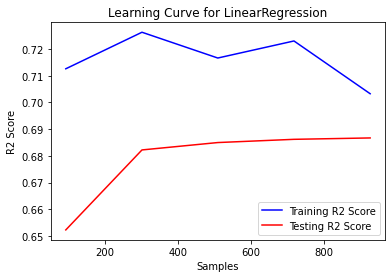

In [72]:
generate_learning_curve('LinearRegression',LinearRegression(), clusters_df.drop(['clusters','strength'],axis=1),clusters_df['strength'])

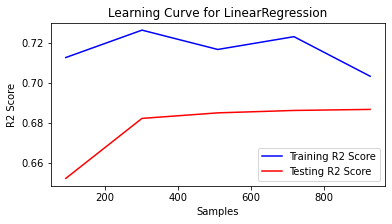

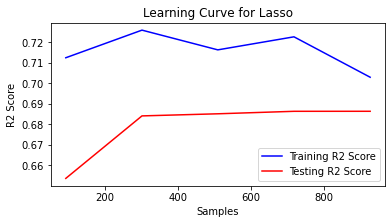

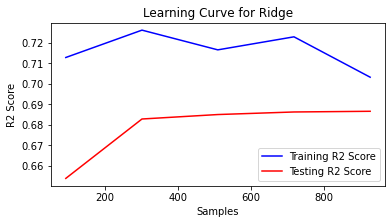

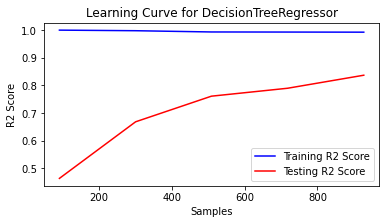

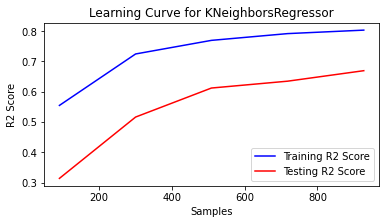

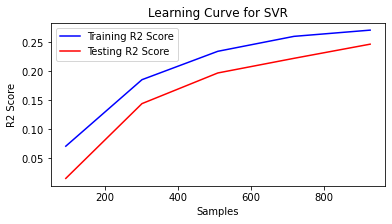

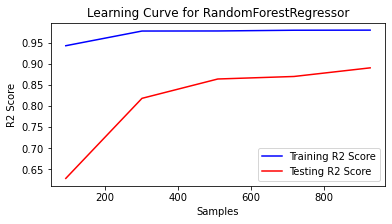

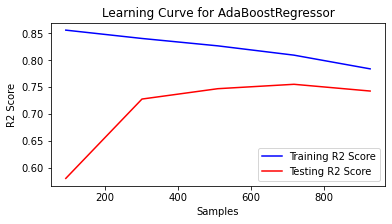

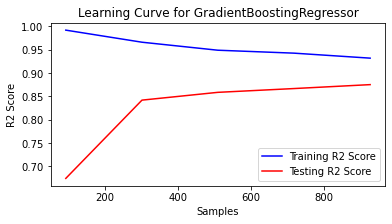

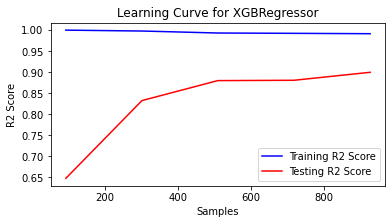

In [73]:
models = [LinearRegression() , Lasso(), Ridge() , DecisionTreeRegressor() , KNeighborsRegressor() ,
            SVR() , RandomForestRegressor() , AdaBoostRegressor() , GradientBoostingRegressor(), 
              XGBRegressor()]
for a , model in enumerate (models):
    fg = plt.figure(figsize= (6 , 3))
    ax = fig.add_subplot(10 , 1 , a+1)
    generate_learning_curve(type(models[a]).__name__ , model , clusters_df.drop(['clusters' , 'strength'] , axis = 1), clusters_df['strength'])
